In [1]:
import re
import nltk
from nltk.corpus import stopwords
import pandas as pd
import json
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import libraries
import pandas as pd
import torch
from transformers import pipeline
import tqdm as notebook_tqdm

C:\ProgramData\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
cleaned_df = pd.read_csv('cleaned_twitter_data.csv')

In [4]:
cleaned_df.info
cleaned_df.describe()

,id,likes,replies,retweets,quotes
count,1.209900e+04,1.209900e+04,12099.000000,12099.000000,12099.000000
mean,1.846718e+18,1.809850e+03,17.927763,214.074552,10.386148
std,1.059508e+16,1.941827e+04,406.397282,2409.580581,163.763263
min,1.367535e+18,0.000000e+00,0.000000,0.000000,0.000000
25%,1.848360e+18,0.000000e+00,0.000000,0.000000,0.000000
50%,1.848418e+18,0.000000e+00,0.000000,0.000000,0.000000
75%,1.848494e+18,3.000000e+00,1.000000,0.000000,0.000000
max,1.848566e+18,1.213300e+06,31868.000000,129109.000000,10584.000000


In [5]:
cleaned_df['text'] = cleaned_df['text'].astype(str)

In [6]:
# remove noise
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    text = text.strip()  # Remove leading/trailing whitespace
    return text

cleaned_df['clean_content'] = cleaned_df['text'].apply(clean_text)

In [7]:
# Tokenization
from nltk.tokenize import word_tokenize
import nltk

# Download the punkt tokenizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
cleaned_df['tokens'] = (cleaned_df['clean_content'].apply(word_tokenize))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [8]:
# Function to check the number of tokens in a tweet
def token_length(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return len(tokens)

# Create a new column 'token_length' to store the number of tokens
cleaned_df['token_length'] = cleaned_df['text'].apply(token_length)

# Filter out rows where token length exceeds 512
cleaned_df = cleaned_df[cleaned_df['token_length'] <= 512]

# Drop the 'token_length' column as it is no longer needed
cleaned_df = cleaned_df.drop(columns=['token_length'])

# Display the remaining dataset
print(cleaned_df.head())

                    id                                                url  \
0  1848565728275746816  https://twitter.com/Don_Mozke/status/184856572...   
1  1848565714145234944  https://twitter.com/assblastinator/status/1848...   
2  1848565686412398848  https://twitter.com/worshipsLNL/status/1848565...   
3  1848538257161695232  https://twitter.com/joma_gc/status/18485382571...   
4  1848446692158542080  https://twitter.com/jackstr06894034/status/184...   

   verified          username                                fullname  \
0     False        @Don_Mozke                        Gleyson Mosquera   
1     False   @assblastinator  Kit | back on emanator duty for Sunday   
2     False      @worshipsLNL                        worshipsladynina   
3      True          @joma_gc                              Bad Hombre   
4     False  @jackstr06894034                              jackstrong   

                                              avatar  \
0  https://cdn.xcancel.comhttps://pbs.twim

In [9]:
# Remove stopwords
from nltk.corpus import stopwords

# Download the stopwords
nltk.download('stopwords')

# Get the English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

cleaned_df['tokens'] = cleaned_df['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Ensure Data Quality
# Remove empty tokens
cleaned_df['tokens'] = cleaned_df['tokens'].apply(lambda x: [token for token in x if token])

# Optionally, remove stopwords (if required)
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))  # Use 'english' for English texts

cleaned_df['tokens'] = cleaned_df['tokens'].apply(lambda x: [token for token in x if token.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

# Download the WordNet lemmatizer
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

cleaned_df['tokens'] = cleaned_df['tokens'].apply(lemmatize)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Review the Cleaned Data
cleaned_df.head()

,id,url,verified,username,fullname,avatar,timestamp,text,links,isQuote,...,replyingTo,likes,replies,retweets,quotes,searchQuery,images,quotedTweet,clean_content,tokens
0,1848565728275746816,https://twitter.com/Don_Mozke/status/184856572...,False,@Don_Mozke,Gleyson Mosquera,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:23:00+00:00,JH es el propio Mike Tyson de temu 🤣 que maner...,[],False,...,['/BlessdOficial'],0,0,0,0,Temu,NaN,NaN,JH es el propio Mike Tyson de temu que manera...,"[JH, e, el, propio, Mike, Tyson, de, temu, que..."
1,1848565714145234944,https://twitter.com/assblastinator/status/1848...,False,@assblastinator,Kit | back on emanator duty for Sunday,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:23:00+00:00,TEMU WANDERER,[],False,...,NaN,0,0,0,0,Temu,NaN,NaN,TEMU WANDERER,"[TEMU, WANDERER]"
2,1848565686412398848,https://twitter.com/worshipsLNL/status/1848565...,False,@worshipsLNL,worshipsladynina,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 03:22:00+00:00,Only when old lady Chia heard these 😮‍💨🧱📋👨‍🦼 ...,[],False,...,NaN,0,0,0,0,Temu,NaN,NaN,Only when old lady Chia heard these \n\nTemu...,"[old, lady, Chia, heard, Temu, Promo, code, ac..."
3,1848538257161695232,https://twitter.com/joma_gc/status/18485382571...,True,@joma_gc,Bad Hombre,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-22 01:33:00+00:00,When you order joy off Temu.,[],False,...,NaN,3303,98,555,28,Temu,['https://cdn.xcancel.comhttps://pbs.twimg.com...,NaN,When you order joy off Temu,"[order, joy, Temu]"
4,1848446692158542080,https://twitter.com/jackstr06894034/status/184...,False,@jackstr06894034,jackstrong,https://cdn.xcancel.comhttps://pbs.twimg.com/p...,2024-10-21 19:30:00+00:00,"Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...",[],False,...,NaN,404,20,128,5,Temu,['https://cdn.xcancel.comhttps://pbs.twimg.com...,NaN,Zoto wzroso o USD co oznacza e Polska zarobia...,"[Zoto, wzroso, USD, co, oznacza, e, Polska, za..."


In [13]:
# Select columns that are necessary
columns_to_keep = ['id', 'timestamp', 'text','clean_content','tokens' ]

# Drop the rest of the columns
cleaned_df = cleaned_df[columns_to_keep]
cleaned_df.head()

,id,timestamp,text,clean_content,tokens
0,1848565728275746816,2024-10-22 03:23:00+00:00,JH es el propio Mike Tyson de temu 🤣 que maner...,JH es el propio Mike Tyson de temu que manera...,"[JH, e, el, propio, Mike, Tyson, de, temu, que..."
1,1848565714145234944,2024-10-22 03:23:00+00:00,TEMU WANDERER,TEMU WANDERER,"[TEMU, WANDERER]"
2,1848565686412398848,2024-10-22 03:22:00+00:00,Only when old lady Chia heard these 😮‍💨🧱📋👨‍🦼 ...,Only when old lady Chia heard these \n\nTemu...,"[old, lady, Chia, heard, Temu, Promo, code, ac..."
3,1848538257161695232,2024-10-22 01:33:00+00:00,When you order joy off Temu.,When you order joy off Temu,"[order, joy, Temu]"
4,1848446692158542080,2024-10-21 19:30:00+00:00,"Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...",Zoto wzroso o USD co oznacza e Polska zarobia...,"[Zoto, wzroso, USD, co, oznacza, e, Polska, za..."


In [62]:
cleaned_df.to_csv('final_clean_data.csv', index=False)

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize sentiment, handling non-string inputs
def get_sentiment(text):
    # Ensure the input is a string
    if isinstance(text, float):
        text = ""
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Fill NaN values in the 'text' column with empty strings
cleaned_df['text'] = cleaned_df['text'].fillna('')

# Apply the function to classify the sentiment for each tweet
cleaned_df['sentiment'] = cleaned_df['text'].apply(get_sentiment)

# Display the data with sentiment labels
print(cleaned_df[['text', 'sentiment']].head())

# Optionally save to CSV
cleaned_df.to_csv('sentiment_twitter_data.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\imran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text sentiment
0  JH es el propio Mike Tyson de temu 🤣 que maner...   neutral
1                                      TEMU WANDERER   neutral
2  Only when old lady Chia heard these  😮‍💨🧱📋👨‍🦼 ...   neutral
3                       When you order joy off Temu.  positive
4  Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...   neutral


In [30]:
from transformers import pipeline

# Initialize the sentiment analysis pipeline using the pre-trained model
sentiment_classifier = pipeline(
    "text-classification",
    model="kwang123/bert-sentiment-analysis",
    tokenizer="kwang123/bert-sentiment-analysis"
)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [31]:
# Function to truncate and classify text
def truncate_and_classify(text):
    # The pipeline automatically handles truncation, no need to manually pass tokens
    result = sentiment_classifier(text, truncation=True, max_length=512)
    return result[0]['label']  # Extract the label

# Apply the model on the entire dataset with truncation
cleaned_df['sentiment'] = cleaned_df['clean_content'].apply(truncate_and_classify)

In [35]:
# Display the result
print(cleaned_df[['text', 'sentiment']].head())

# Optionally save the results to a CSV
cleaned_df.to_csv('sentiment_twitter_data.csv', index=False)


                                                text           sentiment
0  JH es el propio Mike Tyson de temu 🤣 que maner...             Neutral
1                                      TEMU WANDERER             Neutral
2  Only when old lady Chia heard these  😮‍💨🧱📋👨‍🦼 ...             Neutral
3                       When you order joy off Temu.  Extremely Positive
4  Złoto wzrosło o 17 USD, co oznacza, że ​​Polsk...             Neutral


In [38]:
# Data Analysis
# all sentiments statistics
cleaned_df['sentiment'].value_counts()

sentiment
Neutral               6850
Extremely Positive    2126
Negative              1389
Positive              1280
Extremely Negative     453
Name: count, dtype: int64

In [39]:
# all sentiments statistics
cleaned_df['sentiment'].value_counts(normalize=True)

sentiment
Neutral               0.566209
Extremely Positive    0.175732
Negative              0.114812
Positive              0.105803
Extremely Negative    0.037444
Name: proportion, dtype: float64

In [41]:
sentiment_counts = cleaned_df['sentiment'].value_counts()

C:\Users\imran\AppData\Local\Temp\ipykernel_14420\4225162446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


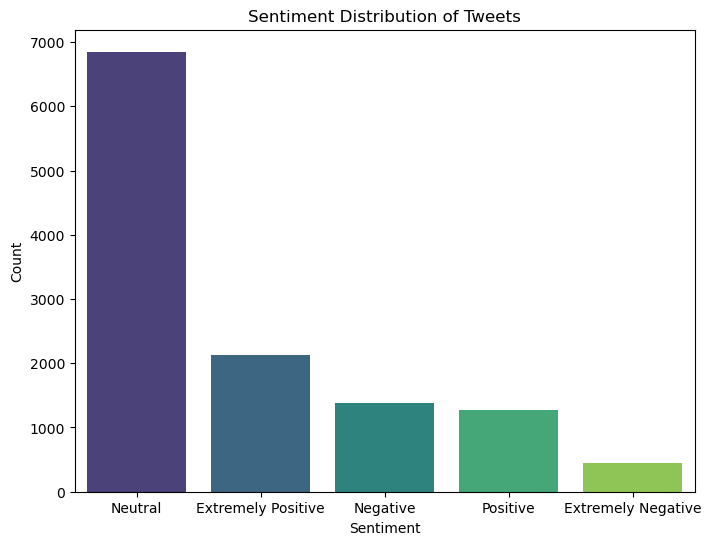

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [56]:
import plotly.express as px
# Sentiment Distribution
sentiment_counts = cleaned_df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

fig = px.bar(sentiment_counts, x='Sentiment', y='Count', title='Sentiment Distribution')
fig.show()
# save the sentiment distribution as an image
fig.write_image('sentiment_distribution.png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [58]:
# Sentiment Trend Over Time
# Trend Analysis by Date using plotly
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])
sentiment_trend = cleaned_df.groupby(['timestamp', 'sentiment']).size().reset_index()
sentiment_trend.columns = ['Date', 'Sentiment', 'Count']

fig = px.line(sentiment_trend, x='Date', y='Count', color='Sentiment', title='Sentiment Trend Over Time')
fig.show()